# Bibliotecas

In [1]:
!pip install yfinance prophet

     --------------------------------------- 12.1/12.1 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.9 MB/s eta 0:00:00
     ------------------------------------- 230.6/230.6 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 340.1/340.1 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 11.4 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=67db3fa519536886a722767e4a1f536f29535c6d4a33e4deb2c2f6eabff61817
  Stored in directory: c:\users\nico1\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus


In [2]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

## carregando dados do histórico

In [3]:
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")
#digitar  ação desejada, como por exemplo AMER3.SA

Digite o código da ação desejada: AMER3.SA


<AxesSubplot:xlabel='Date'>

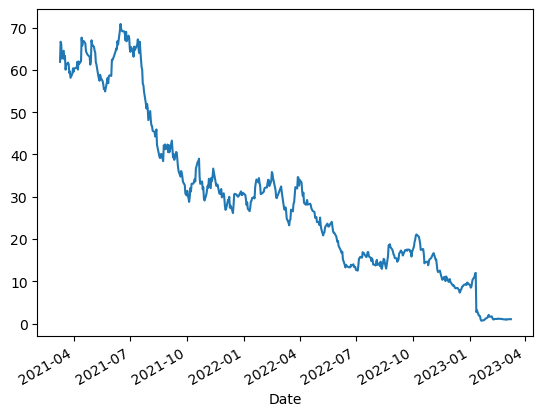

In [4]:
# Variação do período do histórico
dados.Close.plot()

# Preparando os dados de treinamento

In [5]:
# resetando o índice
treinamento = dados.reset_index()

In [6]:
# retirando o fuso horário da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [7]:
# selecionando as colunas de data e valor de fechamento
treinamento = treinamento[['Date', 'Close']]

In [8]:
# renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ['ds', 'y']

In [9]:
# criando o modelo
modelo = Prophet()
# treinando o modelo com os dados de treinamento
modelo.fit(treinamento)
# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)
# gerando as previsões
previsoes = modelo.predict(periodo)

01:20:44 - cmdstanpy - INFO - Chain [1] start processing
01:20:44 - cmdstanpy - INFO - Chain [1] done processing


# Gráficos de previsões - geração


In [11]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")